Selected Points: [[ 710.  289.]
 [1134.  296.]
 [1157.  716.]
 [ 683.  714.]]


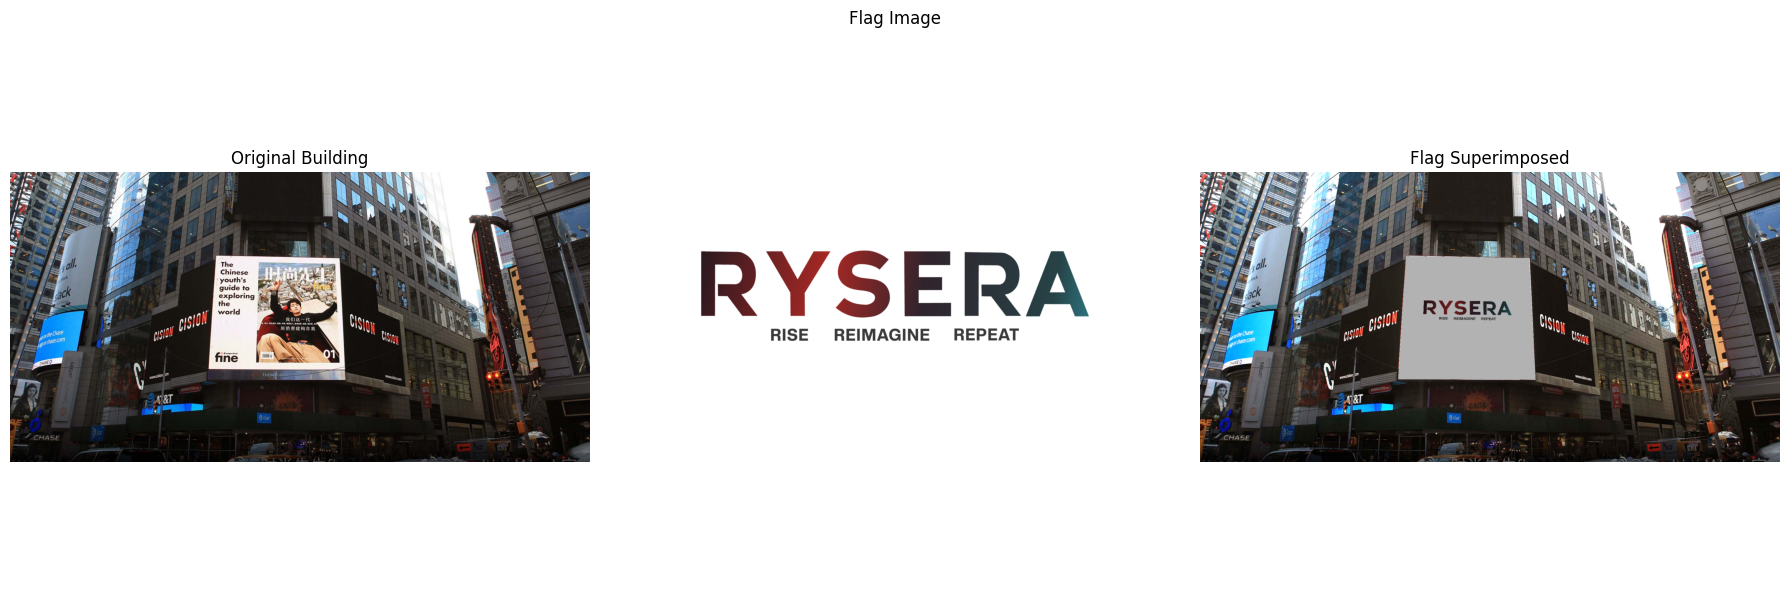

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

bg = cv2.imread('ts2.jpg')   
flag = cv2.imread('Logo Color.png')    

bg_copy = bg.copy()
points = []

# function to select the points
def select_points(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append((x, y))
        cv2.circle(bg_copy, (x, y), 5, (0, 0, 255), -1)
        cv2.imshow("Select 4 Points (click corners of the wall)", bg_copy)

cv2.imshow("Select 4 Points (click corners of the wall)", bg_copy)
cv2.setMouseCallback("Select 4 Points (click corners of the wall)", select_points)
cv2.waitKey(0)
cv2.destroyAllWindows()
if len(points) != 4:
    raise ValueError("You must click exactly 4 points!")

dst_pts = np.array(points, dtype=np.float32)
print("Selected Points:", dst_pts)


h_flag, w_flag = flag.shape[:2]
src_pts = np.array([
    [0, 0],
    [w_flag - 1, 0],
    [w_flag - 1, h_flag - 1],
    [0, h_flag - 1]
], dtype=np.float32)


H, _ = cv2.findHomography(src_pts, dst_pts)
warped_flag = cv2.warpPerspective(flag, H, (bg.shape[1], bg.shape[0]))


gray_flag = cv2.cvtColor(warped_flag, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray_flag, 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)


bg_region = cv2.bitwise_and(bg, bg, mask=mask_inv)
flag_region = cv2.bitwise_and(warped_flag, warped_flag, mask=mask)

alpha = 0.7
blended = cv2.addWeighted(flag_region, alpha, bg_region, 1 - alpha, 0)
final_result = cv2.add(bg_region, blended)


plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.imshow(cv2.cvtColor(bg, cv2.COLOR_BGR2RGB))
plt.title("Original Building")
plt.axis("off")

plt.subplot(132)
plt.imshow(cv2.cvtColor(flag, cv2.COLOR_BGR2RGB))
plt.title("Flag Image")
plt.axis("off")

plt.subplot(133)
plt.imshow(cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB))
plt.title("Flag Superimposed")
plt.axis("off")

plt.tight_layout()
plt.show()
